In [256]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [279]:
def get_data(type_data: str) -> pd.DataFrame:
    file_path = Path().parent / f'data/{type_data}.csv'

    return pd.read_csv(file_path)

In [280]:
data = get_data("train")

In [281]:
print(data.head())

     id  num_rooms  num_baths  square_meters orientation  year_built     door  \
0  9255        1.0        1.0            NaN         NaN      1956.0  3º - 1a   
1  1562        4.0        1.0          133.0        west      1960.0  7º - 2a   
2  1671        2.0        3.0          137.0         NaN      2000.0  1º - 1a   
3  6088        1.0        2.0          -41.0         NaN      2002.0  6º - 1a   
4  6670        2.0        1.0           70.0         NaN      1979.0  5º - 1a   

  is_furnished has_pool neighborhood  num_crimes has_ac accepts_pets  \
0        False    False   Sant Martí         2.0   True         True   
1        False    False        Sants         4.0  False        False   
2        False     True     Eixample         0.0  False        False   
3        False     True        Sants         5.0  False        False   
4         True    False       Gràcia         0.0  False         True   

   num_supermarkets  price  
0               NaN   1096  
1               2.0   

# 1. Data preprocessing


## Variable generation

In [260]:

#### getting floor variable from door
import re

def extract_first_number(s):
    if isinstance(s, str):  # Check if the value is a string
        match = re.match(r'^(\d{1,2})º', s)  # Match 1 or 2 digits before 'º'
        return int(match.group(1)) if match else None  # Return the extracted number
    return None  # Return None for non-string values (like NaN)


# Apply the function to the 'category' column to create a new numerical column
data['floor'] = data['door'].apply(extract_first_number)



In [282]:
print(data.head())

     id  num_rooms  num_baths  square_meters orientation  year_built     door  \
0  9255        1.0        1.0            NaN         NaN      1956.0  3º - 1a   
1  1562        4.0        1.0          133.0        west      1960.0  7º - 2a   
2  1671        2.0        3.0          137.0         NaN      2000.0  1º - 1a   
3  6088        1.0        2.0          -41.0         NaN      2002.0  6º - 1a   
4  6670        2.0        1.0           70.0         NaN      1979.0  5º - 1a   

  is_furnished has_pool neighborhood  num_crimes has_ac accepts_pets  \
0        False    False   Sant Martí         2.0   True         True   
1        False    False        Sants         4.0  False        False   
2        False     True     Eixample         0.0  False        False   
3        False     True        Sants         5.0  False        False   
4         True    False       Gràcia         0.0  False         True   

   num_supermarkets  price  
0               NaN   1096  
1               2.0   

In [283]:
# categorials to numerical
def preprocess_data(data):
    categorical_columns = [
        "has_pool",
        "is_furnished",
        "orientation",
        "has_ac",
        "accepts_pets",
        "neighborhood"
    ]
    
    # Check if the data is valid
    if data is None:
        raise ValueError("The input data cannot be None.")
    
    # Apply transformation
    for column in categorical_columns:
        if column not in data.columns:
            raise ValueError(f"Column '{column}' is not found in the data.")
        data[column] = to_numerical(column=data[column])
    
    return data

# Make sure train_data is properly initialized before calling preprocess_data
data = preprocess_data(data=data)

data = data.drop(columns=['door'])



In [284]:
print(data.head())

     id  num_rooms  num_baths  square_meters  orientation  year_built  \
0  9255        1.0        1.0            NaN          NaN      1956.0   
1  1562        4.0        1.0          133.0          1.0      1960.0   
2  1671        2.0        3.0          137.0          NaN      2000.0   
3  6088        1.0        2.0          -41.0          NaN      2002.0   
4  6670        2.0        1.0           70.0          NaN      1979.0   

   is_furnished  has_pool  neighborhood  num_crimes  has_ac  accepts_pets  \
0           1.0       1.0           1.0         2.0     1.0           1.0   
1           1.0       1.0           2.0         4.0     2.0           2.0   
2           1.0       2.0           3.0         0.0     2.0           2.0   
3           1.0       2.0           2.0         5.0     2.0           2.0   
4           2.0       1.0           4.0         0.0     2.0           1.0   

   num_supermarkets  price  
0               NaN   1096  
1               2.0   1396  
2          

## splitting to test and train


In [285]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_data))
print(len(test_data))


6400
1600


## 1. Missing values


### 1. drop missing

In [286]:
## drop all misising
def missing_impute1(data):
    data.dropna()
    return data


### 2. impute missing with median


In [306]:
def missing_impute_median(data):
    return data.fillna(data.median())
    


### 3. Imputations with nearest neighbors

In [179]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Apply the KNNImputer to the DataFrame
# KNNImputer expects all columns to be numeric, so ensure there are no non-numeric columns
df_imputed2 = train_data(imputer.fit_transform(df), columns=df.columns)

# Show the DataFrame after imputation
print(df_imputed2.head())

NameError: name 'df' is not defined

## 2. Outliers

### num_rooms

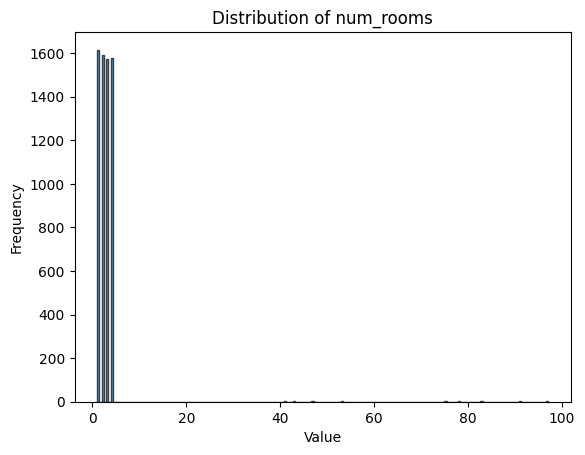

In [206]:
plt.hist(imputed_train1['num_rooms'], bins=200, edgecolor='black', alpha=0.7)

# Add labels and show plot
plt.title('Distribution of num_rooms')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

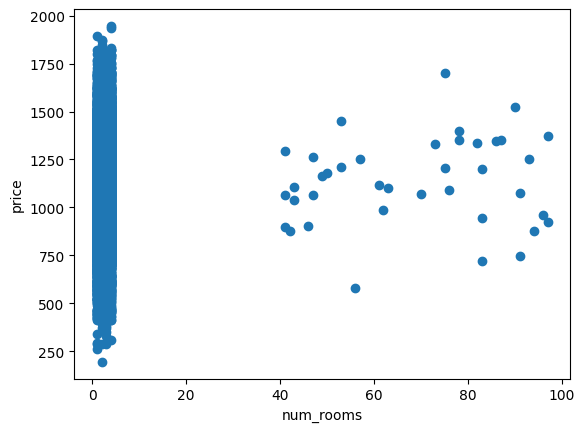

In [207]:
plt.scatter(imputed_train1['num_rooms'], imputed_train1['price'])
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.show()

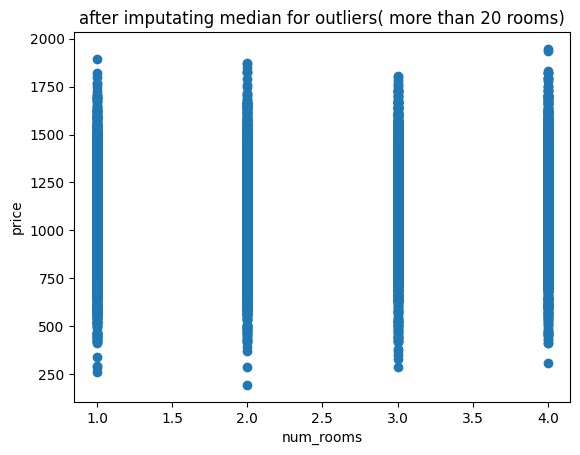

In [288]:
# replace outlier with median
def num_rooms_median(data):
    median_value = data['num_rooms'].median()
    data.loc[data['num_rooms'] > 10, 'num_rooms'] = median_value
    return data

imputed_train1 = num_rooms_median(imputed_train1)

plt.scatter(imputed_train1['num_rooms'], imputed_train1['price'])
plt.title('after imputating median for outliers( more than 20 rooms)')
plt.xlabel('num_rooms')
plt.ylabel('price')
plt.show()

### square meters


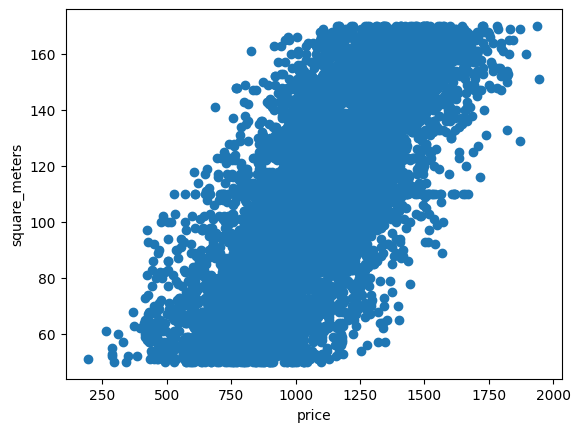

In [289]:
plt.scatter(imputed_train1['price'], imputed_train1['square_meters'])
plt.xlabel('price')
plt.ylabel('square_meters')
plt.show()

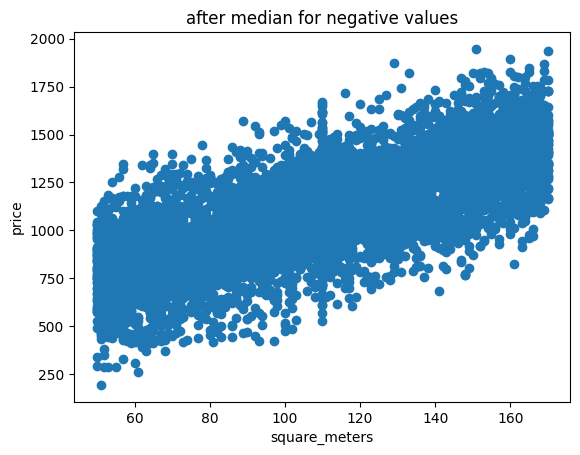

In [290]:

# replace outlier with median
def square_median(data):
    median_value = data.loc[data['square_meters']  >= 0, 'square_meters'].median()
    data.loc[data['square_meters'] < 0, 'square_meters'] = median_value
    return data

#imputed_train1 =square_median(imputed_train1)
plt.scatter(imputed_train1['square_meters'], imputed_train1['price'])
plt.title('after median for negative values')
plt.xlabel('square_meters')
plt.ylabel('price')
plt.show()

### num_baths

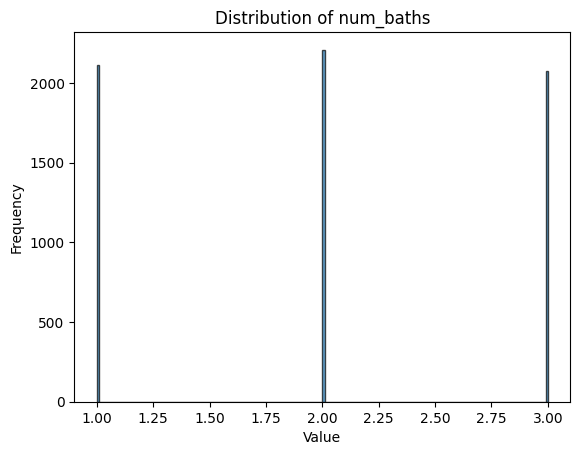

In [211]:
plt.hist(imputed_train1['num_baths'], bins=200, edgecolor='black', alpha=0.7)

# Add labels and show plot
plt.title('Distribution of num_baths')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [217]:
count = (imputed_train1['num_baths'] >= imputed_train1['num_rooms']).sum()

# Output the result
print("Number of times num_baths >= num_rooms:", count)

Number of times num_baths >= num_rooms: 3239


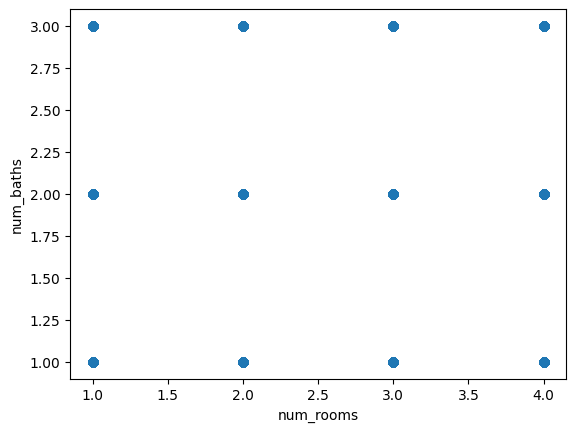

In [218]:
plt.scatter(imputed_train1['num_rooms'], imputed_train1['num_baths'])
plt.xlabel('num_rooms')
plt.ylabel('num_baths')
plt.show()

### orientation

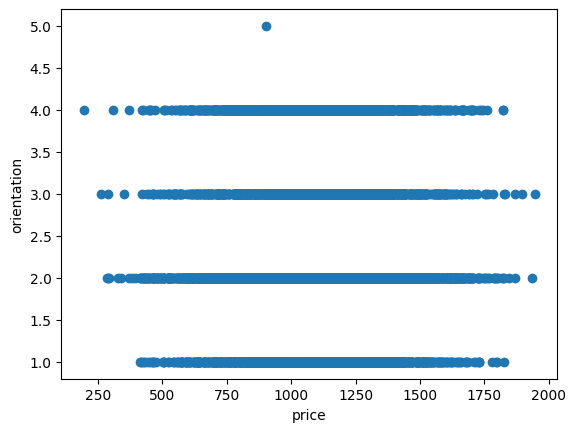

In [213]:
plt.scatter(imputed_train1['price'], imputed_train1['orientation'])
plt.xlabel('price')
plt.ylabel('orientation')
plt.show()

### year built


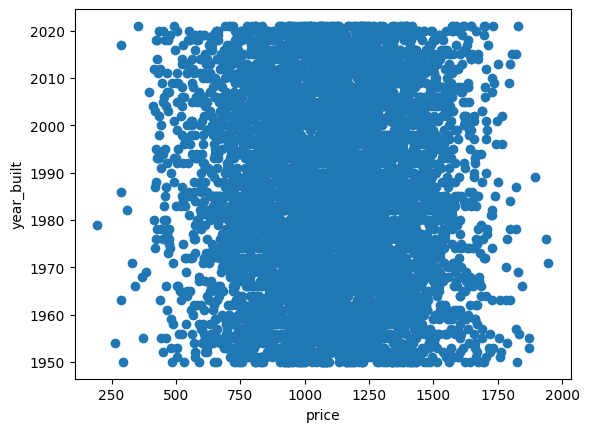

In [214]:
plt.scatter(imputed_train1['price'], imputed_train1['year_built'])
plt.xlabel('price')
plt.ylabel('year_built')
plt.show()

### floor

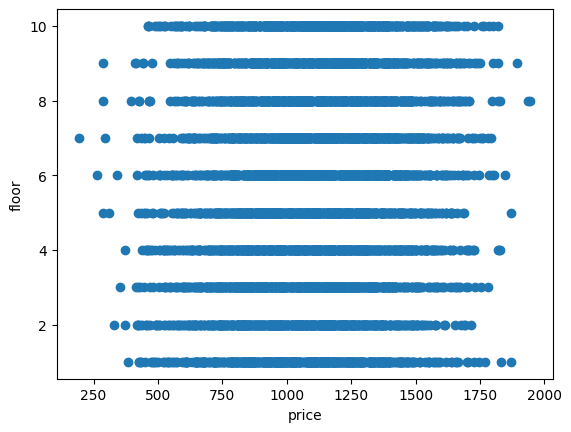

In [215]:
plt.scatter(imputed_train1['price'], imputed_train1['floor'])
plt.xlabel('price')
plt.ylabel('floor')
plt.show()

### is furnished

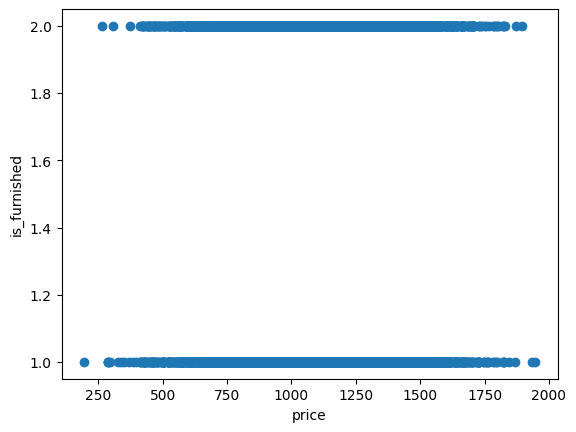

In [216]:
plt.scatter(imputed_train1['price'], imputed_train1['is_furnished'])
plt.xlabel('price')
plt.ylabel('is_furnished')
plt.show()

## 3. Correlations

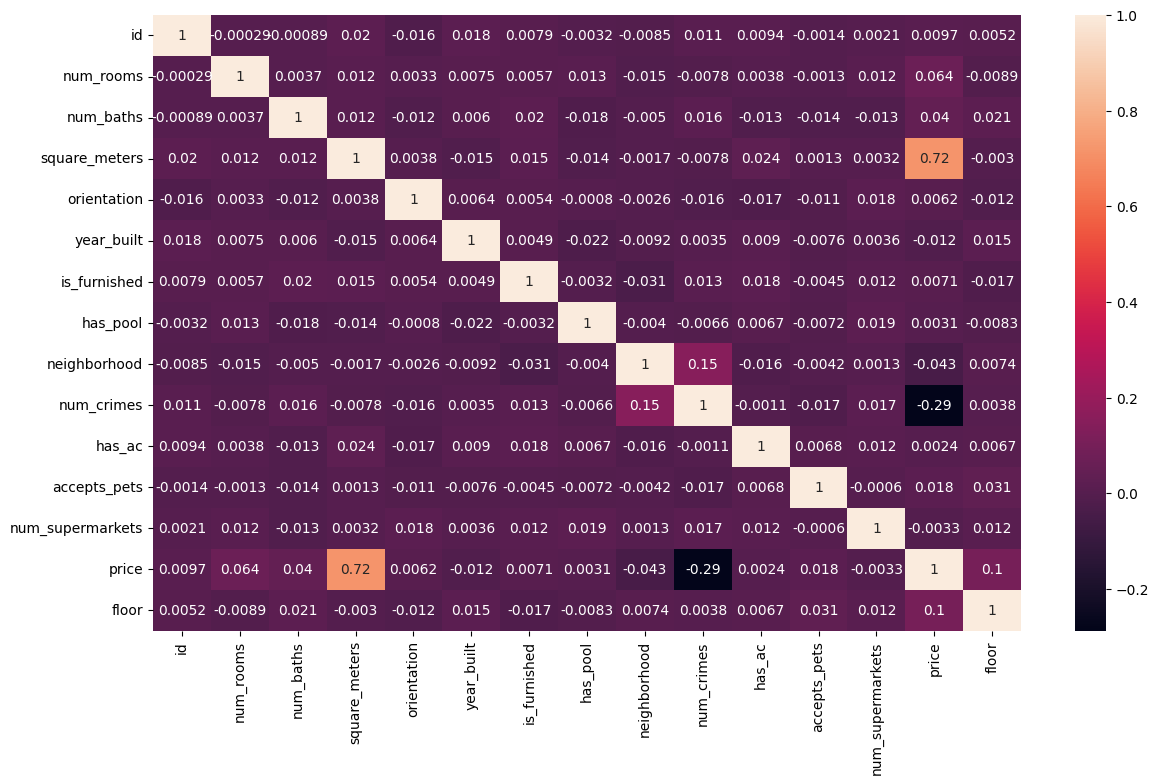

In [252]:

df_corr = imputed_train1.corr()

# Plot correlations
# Remove upper triangle
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.heatmap(df_corr, annot = True)

# 2. Models

In [317]:
## data sets

# impute medians
imputed1_train = num_rooms_median(train_data)
imputed1_train = square_median(imputed1_train)
imputed1_train = missing_impute_median(imputed1_train)

# test 
imputed1_test = num_rooms_median(test_data)
imputed1_test = square_median(imputed1_test)
imputed1_test = missing_impute_median(imputed1_test)


In [318]:
print(imputed1_train.head())

        id  num_rooms  num_baths  square_meters  orientation  year_built  \
1467  2580        2.0        1.0          111.0          3.0      1968.0   
5768  7129        1.0        1.0           97.0          1.0      1971.0   
5714  4083        3.0        1.0          160.0          2.0      1951.0   
1578  2551        4.0        1.0          116.0          3.0      2009.0   
6958  4927        1.0        2.0          165.0          1.0      2002.0   

      is_furnished  has_pool  neighborhood  num_crimes  has_ac  accepts_pets  \
1467           1.0       1.0           8.0        10.0     1.0           1.0   
5768           1.0       1.0           6.0         0.0     2.0           2.0   
5714           2.0       2.0          10.0         4.0     1.0           1.0   
1578           2.0       2.0           3.0         0.0     2.0           1.0   
6958           2.0       1.0          10.0         2.0     1.0           1.0   

      num_supermarkets  price  
1467               2.0   1074 

In [319]:
from sklearn.linear_model import LinearRegression

data1 = imputed1_train

X = data1.drop(columns=["price"])
y = data1["price"]

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept



(array([-1.24791232e-04,  1.29603594e+01,  1.19341466e+01,  5.61176436e+00,
        -2.13396037e-01, -1.01589828e-02, -1.29448317e-01,  6.11408732e+00,
         1.91360967e-01, -2.22717606e+01, -8.19937868e+00,  7.38902830e+00,
        -7.05556030e-01]),
 np.float64(502.49475313594644))

In [320]:
mse = mean_squared_error(y, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 29552.626424744954


In [321]:
## testing model
X_test = imputed1_test.drop(columns=["price"])

# Make predictions using the trained model
y_test_pred = model.predict(X_test)

y_test = imputed1_test['price']

mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error Test: {mse_test}')

Mean Squared Error Test: 31760.40006099172
